## Validation Plots

Initial set of plots to investigate outputs and confirm expected behaviours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams["font.family"] = "Times New Roman"


In [2]:
csv_file_path = r"outputs\LL-Output-Fri-18-Oct-2024-at-02-35-26PM.txt"

metadata = pd.read_csv(csv_file_path, header=None, nrows=6)

date = metadata.iloc[1, 0]  
size = metadata.iloc[2, 0]  
MCsteps = metadata.iloc[3, 0]  
T = metadata.iloc[4, 0]  
time = metadata.iloc[5, 0]  

print(date)
print(size)
print(MCsteps)
print(T)
print(time)

df = pd.read_csv(csv_file_path, skiprows=9,  sep='\s+')
df.columns = ['MC_Step', 'Ratio', 'Energy', 'Order']


# File created:        Fri-18-Oct-2024-at-02-35-26PM
# Size of lattice:     10x10
# Number of MC steps:  50
# Reduced temperature: 0.500
# Run time (s):        0.192885


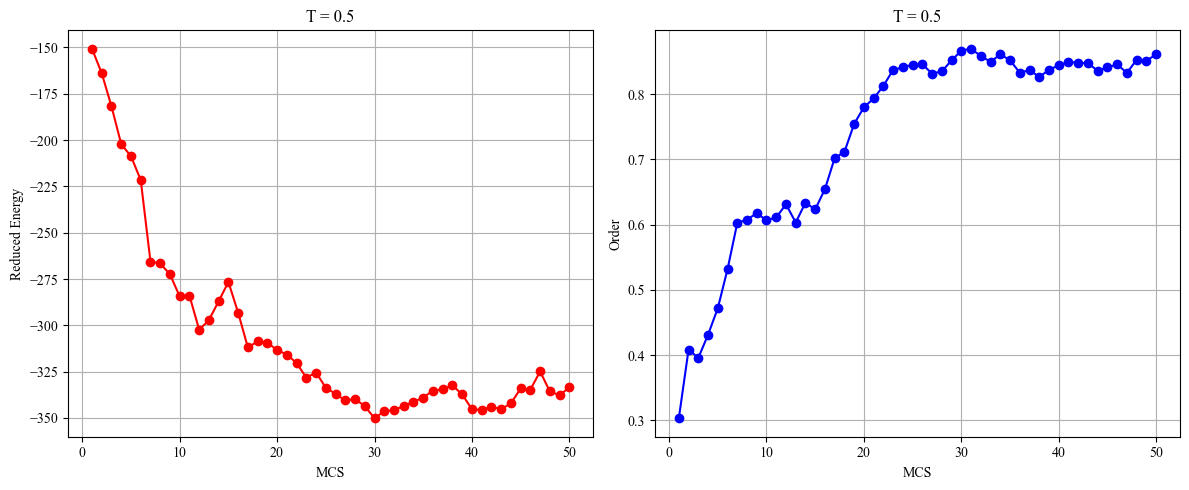

In [3]:
# Checking Convergence
plt.figure(figsize=(12, 5))

# Subplot for Energy vs MC_Step
plt.subplot(1, 2, 1) 
plt.plot(df['MC_Step'], df['Energy'], marker='o', color='r')
plt.title('T = 0.5')
plt.xlabel('MCS')
plt.ylabel('Reduced Energy')
plt.grid()

# Subplot for Order vs MC_Step
plt.subplot(1, 2, 2) 
plt.plot(df['MC_Step'], df['Order'], marker='o', color='b')
plt.title('T = 0.5')
plt.xlabel('MCS')
plt.ylabel('Order')
plt.grid()


plt.tight_layout()
plt.show()


## Time Evaluation

In [4]:
def extract_size_time(file_name):
    data = []

    #read file
    with open(f"outputs/{file_name}", 'r', encoding='utf-16') as file:
        lines = file.readlines()

    #regex pattern to match Size and Time
    pattern = r"Size:\s*(\d+).*?Time:\s*([\d.]+)\s*s"

    for line in lines:
        match = re.search(pattern, line)
        if match:
            size = int(match.group(1))  
            time = float(match.group(2))  
            
            data.append({'Size': size, 'Time': time})

    return data

In [5]:
data = extract_size_time("basic.txt")
df = pd.DataFrame(data)

cythonraw = extract_size_time("cython-raw.txt")
cythonrawdf = pd.DataFrame(cythonraw)

cythonbasic = pd.DataFrame(extract_size_time("cython-basic.txt"))
cythonfull = pd.DataFrame(extract_size_time("cython-full.txt"))

npvector = pd.DataFrame(extract_size_time("npvector.txt"))

numbaj = pd.DataFrame(extract_size_time("numbajit.txt"))
numbapMC = pd.DataFrame(extract_size_time("numba-parallelMC.txt"))

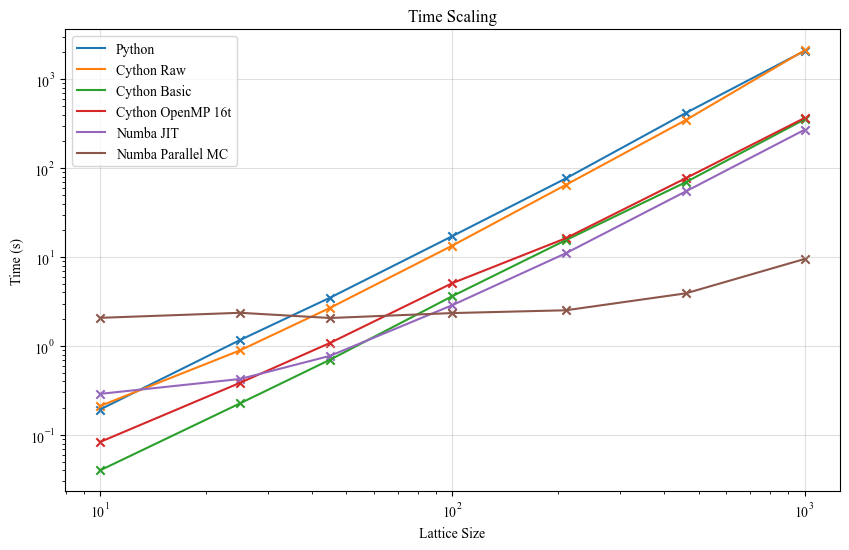

In [6]:

plt.figure(figsize=(10, 6))

#Basic Data
plt.scatter(df['Size'], df['Time'], marker='x')
plt.plot(df['Size'], df['Time'], label='Python')

#Numpy Vectorisation
plt.scatter(npvector['Size'], npvector['Time'], marker='x')
plt.plot(npvector['Size'], npvector['Time'], label='Python')

#Raw Cythonised Data
plt.scatter(cythonrawdf['Size'], cythonrawdf['Time'], marker='x')
plt.plot(cythonrawdf['Size'], cythonrawdf['Time'], label='Cython Raw')

#Basic Cython 
plt.scatter(cythonbasic['Size'], cythonbasic['Time'], marker='x')
plt.plot(cythonbasic['Size'],  cythonbasic['Time'], label='Cython Basic')

#OpenMP Cython
plt.scatter( cythonfull['Size'], cythonfull['Time'], marker='x')
plt.plot(cythonfull['Size'], cythonfull['Time'], label='Cython OpenMP 16t')

#Numba JIT
plt.scatter(numbaj['Size'], numbaj['Time'], marker='x')
plt.plot(numbaj['Size'], numbaj['Time'], label='Numba JIT')

#Numba Parallel MC
plt.scatter(numbapMC['Size'], numbapMC['Time'], marker='x')
plt.plot(numbapMC['Size'], numbapMC['Time'], label='Numba Parallel MC')


#Formatting  
plt.yscale('log')
plt.xscale('log')
plt.title('Time Scaling')
plt.xlabel('Lattice Size')
plt.ylabel('Time (s)')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()